In [ ]:
pip install --user numpy==1.22.0

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install --upgrade numpy

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score

In [ ]:
from collections import Counter

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# Load the dataset into a DataFrame
df = pd.read_csv(r"C:\Users\malon\OneDrive\Documents\DS 440 Capstone\cleaned-stroke-data(update).csv")
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,60182,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,56669,Male,81,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3421,68398,Male,82,1,0,Yes,Self-employed,Rural,71.97,28.3,never smoked,0
3422,45010,Female,57,0,0,Yes,Private,Rural,77.93,21.7,never smoked,0
3423,44873,Female,81,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
3424,19723,Female,35,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0


In [ ]:
one_hot_encoded_data = pd.get_dummies(df, columns = ['smoking_status', 'work_type'])
one_hot_encoded_data

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,9046,Male,67,0,1,Yes,Urban,228.69,36.6,1,1,0,0,0,0,1,0,0
1,31112,Male,80,0,1,Yes,Rural,105.92,32.5,1,0,1,0,0,0,1,0,0
2,60182,Female,49,0,0,Yes,Urban,171.23,34.4,1,0,0,1,0,0,1,0,0
3,1665,Female,79,1,0,Yes,Rural,174.12,24.0,1,0,1,0,0,0,0,1,0
4,56669,Male,81,0,0,Yes,Urban,186.21,29.0,1,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3421,68398,Male,82,1,0,Yes,Rural,71.97,28.3,0,0,1,0,0,0,0,1,0
3422,45010,Female,57,0,0,Yes,Rural,77.93,21.7,0,0,1,0,0,0,1,0,0
3423,44873,Female,81,0,0,Yes,Urban,125.20,40.0,0,0,1,0,0,0,0,1,0
3424,19723,Female,35,0,0,Yes,Rural,82.99,30.6,0,0,1,0,0,0,0,1,0


In [ ]:
df2 = one_hot_encoded_data
df2['gender'] = df2['gender'].replace({'Male': 1, 'Female': 0})
df2['ever_married'] = df2['ever_married'].replace({'Yes': 1, 'No': 0})
df2['Residence_type'] = df2['Residence_type'].replace({'Urban': 1, 'Rural': 0})
df2 = df2[df2['gender'] != 'Other']
df2

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,9046,1,67,0,1,1,1,228.69,36.6,1,1,0,0,0,0,1,0,0
1,31112,1,80,0,1,1,0,105.92,32.5,1,0,1,0,0,0,1,0,0
2,60182,0,49,0,0,1,1,171.23,34.4,1,0,0,1,0,0,1,0,0
3,1665,0,79,1,0,1,0,174.12,24.0,1,0,1,0,0,0,0,1,0
4,56669,1,81,0,0,1,1,186.21,29.0,1,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3421,68398,1,82,1,0,1,0,71.97,28.3,0,0,1,0,0,0,0,1,0
3422,45010,0,57,0,0,1,0,77.93,21.7,0,0,1,0,0,0,1,0,0
3423,44873,0,81,0,0,1,1,125.20,40.0,0,0,1,0,0,0,0,1,0
3424,19723,0,35,0,0,1,0,82.99,30.6,0,0,1,0,0,0,0,1,0


In [ ]:
# Split the data into features and target (X and y)
X = df2.drop(columns=['stroke'])
y = df2['stroke']

In [ ]:
print(X)
print(y)

         id gender  age  hypertension  heart_disease  ever_married  \
0      9046      1   67             0              1             1   
1     31112      1   80             0              1             1   
2     60182      0   49             0              0             1   
3      1665      0   79             1              0             1   
4     56669      1   81             0              0             1   
...     ...    ...  ...           ...            ...           ...   
3421  68398      1   82             1              0             1   
3422  45010      0   57             0              0             1   
3423  44873      0   81             0              0             1   
3424  19723      0   35             0              0             1   
3425  37544      1   51             0              0             1   

      Residence_type  avg_glucose_level   bmi  smoking_status_formerly smoked  \
0                  1             228.69  36.6                               1 

In [ ]:
# Standardize features (optional, but often recommended)
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Check the number of records
print('The number of records in the training dataset is', X_train.shape[0])
print('The number of records in the test dataset is', X_test.shape[0])
print(f"The training dataset has {sorted(Counter(y_train).items())[0][1]} records for the majority class and {sorted(Counter(y_train).items())[1][1]} records for the minority class.")

The number of records in the training dataset is 2740
The number of records in the test dataset is 685
The training dataset has 2604 records for the majority class and 136 records for the minority class.


In [ ]:
# Build a neural network model with dropout layers
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))  # Dropout layer with 20% dropout rate
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))  # Dropout layer with 20% dropout rate
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))  # Output layer for binary classification

In [ ]:
model

In [ ]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
69/69 [==============================] - 1s 3ms/step - loss: 0.1586 - accuracy: 0.9484 - val_loss: 0.1569 - val_accuracy: 0.9580
Epoch 2/10
69/69 [==============================] - 0s 2ms/step - loss: 0.1570 - accuracy: 0.9480 - val_loss: 0.1579 - val_accuracy: 0.9580
Epoch 3/10
69/69 [==============================] - 0s 2ms/step - loss: 0.1566 - accuracy: 0.9494 - val_loss: 0.1569 - val_accuracy: 0.9580
Epoch 4/10
69/69 [==============================] - 0s 3ms/step - loss: 0.1547 - accuracy: 0.9475 - val_loss: 0.1591 - val_accuracy: 0.9580
Epoch 5/10
69/69 [==============================] - 0s 3ms/step - loss: 0.1571 - accuracy: 0.9480 - val_loss: 0.1597 - val_accuracy: 0.9599
Epoch 6/10
69/69 [==============================] - 0s 2ms/step - loss: 0.1546 - accuracy: 0.9494 - val_loss: 0.1581 - val_accuracy: 0.9599
Epoch 7/10
69/69 [==============================] - 0s 2ms/step - loss: 0.1535 - accuracy: 0.9498 - val_loss: 0.1589 - val_accuracy: 0.9599
Epoch 8/10
69/69 [==

In [ ]:
# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)

print(f'Test Accuracy: {accuracy}')
print(f'Test Precision: {precision}')

22/22 [==============================] - 0s 865us/step
Test Accuracy: 0.9357664233576642
Test Precision: 0.0


C:\Users\malon\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)

Epoch 1/10
69/69 [==============================] - 0s 2ms/step - loss: 0.1373 - accuracy: 0.9494 - val_loss: 0.1680 - val_accuracy: 0.9599
Epoch 2/10
69/69 [==============================] - 0s 2ms/step - loss: 0.1367 - accuracy: 0.9480 - val_loss: 0.1706 - val_accuracy: 0.9580
Epoch 3/10
69/69 [==============================] - 0s 2ms/step - loss: 0.1349 - accuracy: 0.9530 - val_loss: 0.1679 - val_accuracy: 0.9599
Epoch 4/10
69/69 [==============================] - 0s 2ms/step - loss: 0.1352 - accuracy: 0.9535 - val_loss: 0.1689 - val_accuracy: 0.9599
Epoch 5/10
69/69 [==============================] - 0s 2ms/step - loss: 0.1339 - accuracy: 0.9516 - val_loss: 0.1695 - val_accuracy: 0.9599
Epoch 6/10
69/69 [==============================] - 0s 2ms/step - loss: 0.1394 - accuracy: 0.9503 - val_loss: 0.1687 - val_accuracy: 0.9599
Epoch 7/10
69/69 [==============================] - 0s 2ms/step - loss: 0.1338 - accuracy: 0.9535 - val_loss: 0.1660 - val_accuracy: 0.9599
Epoch 8/10
69/69 [==

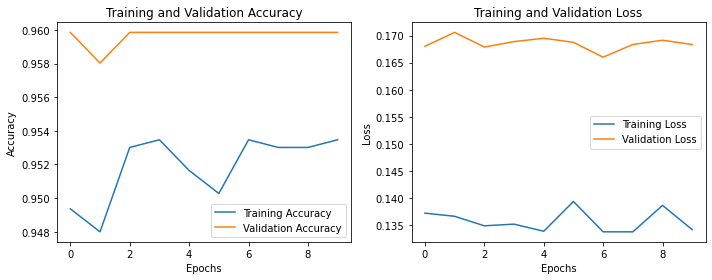

Test Accuracy: 0.9358


In [ ]:
# Plot training history
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(loc='best')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

# Display test accuracy
print(f'Test Accuracy: {test_accuracy:.4f}')